### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
import seaborn as sn
%matplotlib inline
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.head(50)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   
20           84         47.0                  75.0         153.0   
21           84         37.0                  53.0         121.0   
22           94         43.0                  64.0         173.0   
23           87         39.0                  70.0         148.0   
24           99         53.0                 105.0         219.0   
25           85         45.0                  80.0         154.0   
26           83         36.0                  54.0         119.0   
27          107         54.0                  98.0         203.0   
28          102         45.0                  85.0         193.0   
29           80         38.0                  63.0         129.0   
30           89         43.0                  85.0         160.0   
31           88         42.0                  77.0         151.0   
32           93         35.0                  66.0         154.0   
33          101         48.0                 107.0         222.0   
34           87         38.0                  85.0         177.0   
35          100         46.0                   NaN         172.0   
36           82         44.0                  72.0         118.0   
37           90         48.0                  86.0         306.0   
38          106         53.0                  98.0         176.0   
39           81         45.0                  68.0         169.0   
40           95         48.0                 104.0         214.0   
41           88         37.0                  51.0         105.0   
42           94         49.0                  87.0         137.0   
43           93         37.0                  76.0         183.0   
44          119         54.0                 106.0         220.0   
45           93         46.0                  82.0         145.0   
46           91         43.0                  70.0         133.0   
47           85         42.0                  66.0         122.0   
48           89         47.0                  81.0         147.0   
49           91         45.0                  79.0         176.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          

In [3]:
vehicle_df.shape

(846, 19)

In [4]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
vehicle_df = vehicle_df.dropna(axis=0)

In [7]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

car    413
bus    205
van    195
Name: class, dtype: int64


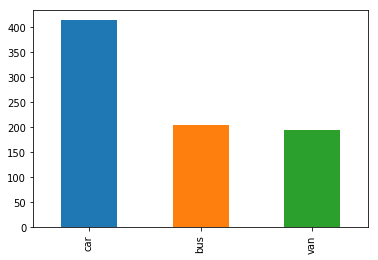

In [8]:
print(vehicle_df['class'].value_counts())
vehicle_df['class'].value_counts().plot(kind='bar')

Since the variable is categorical, you can use value_counts function

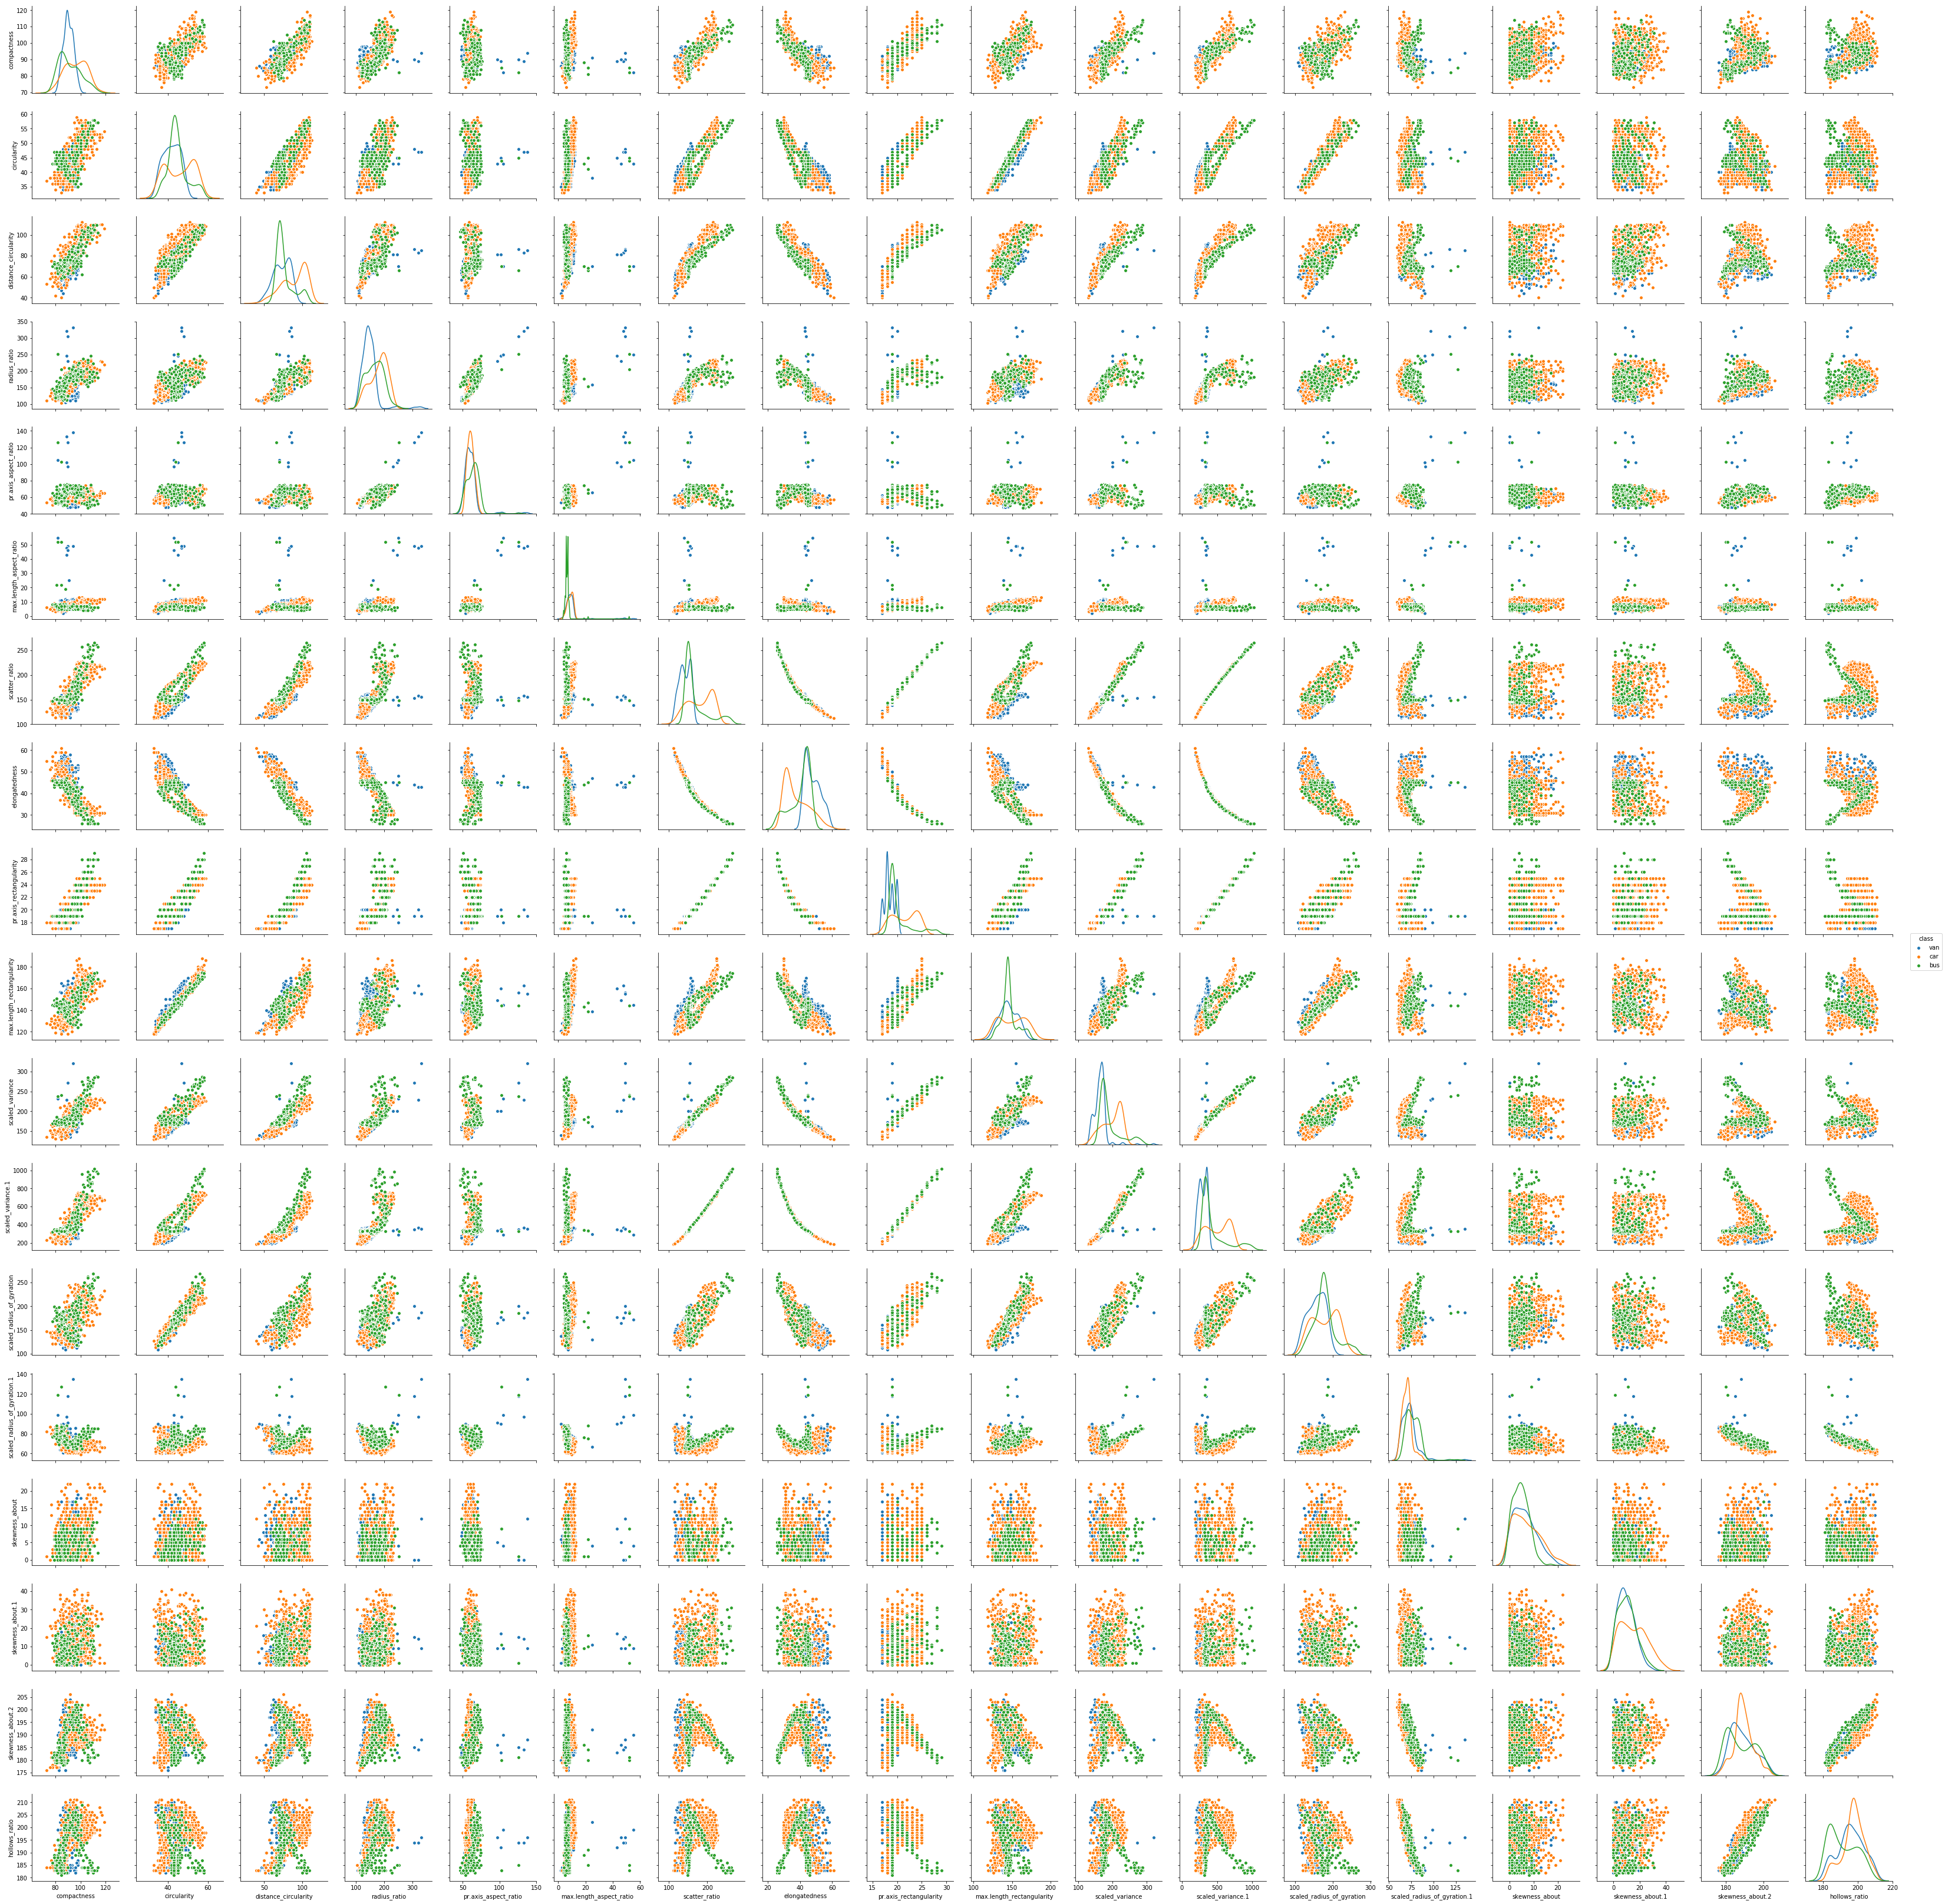

In [9]:
sns.pairplot(vehicle_df,hue='class', diag_kind = 'kde')

### Check for any missing values in the data 

In [ ]:
#by observing the excel one can notice that there are blank values in the cells so replacing blank with nan's and replacing nan
#with appropriate value like mean or median

In [10]:
vehicle_df.replace(r'\s+', np.nan, regex=True)#initial removing of NAN's has removed the blank value rows

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
6             97         43.0                  73.0         173.0   
7             90         43.0                  66.0         157.0   
8             86         34.0                  62.0         140.0   
10            86         36.0                  70.0         143.0   
11            90         34.0                  66.0         136.0   
12            88         46.0                  74.0         171.0   
13            89         42.0                  85.0         144.0   
14            94         49.0                  79.0         203.0   
15            96         55.0                 103.0         201.0   
16            89         36.0                  51.0         109.0   
17            99         41.0                  77.0         197.0   
18           104         54.0                 100.0         186.0   
20            84         47.0                  75.0         153.0   
21            84         37.0                  53.0         121.0   
22            94         43.0                  64.0         173.0   
23            87         39.0                  70.0         148.0   
24            99         53.0                 105.0         219.0   
25            85         45.0                  80.0         154.0   
26            83         36.0                  54.0         119.0   
27           107         54.0                  98.0         203.0   
28           102         45.0                  85.0         193.0   
29            80         38.0                  63.0         129.0   
30            89         43.0                  85.0         160.0   
31            88         42.0                  77.0         151.0   
32            93         35.0                  66.0         154.0   
..           ...          ...                   ...           ...   
816           90         48.0                  85.0         157.0   
817          104         53.0                 108.0         204.0   
818           95         43.0                  96.0         202.0   
819           93         42.0                  98.0         192.0   
820           87         38.0                  71.0         123.0   
821          104         56.0                  96.0         231.0   
822           95         41.0                  82.0         170.0   
823          105         54.0                 105.0         213.0   
824          106         55.0                  96.0         196.0   
825           86         39.0                  84.0         149.0   
826           95         49.0                  92.0         193.0   
827           99         57.0                 100.0         177.0   
828           89         42.0                  66.0         125.0   
829           95         49.0                  82.0         139.0   
830           97         37.0                  70.0         173.0   
831          100         47.0                  70.0         185.0   
832          108         49.0                 109.0         204.0   
833           92         46.0                  83.0         154.0   
834           82         36.0                  51.0         114.0   
835          111         58.0                 105.0         183.0   
836           87         45.0                  66.0         139.0   
837           94         46.0                  77.0         169.0   
838           95         43.0                  76.0         142.0   
839           90         44.0                  72.0         157.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
842

In [11]:
vehicle_df[vehicle_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [12]:
vehicle_df.shape

(813, 19)

### 3. Standardize the data 

In [18]:
vehicle_df = pd.get_dummies(vehicle_df,columns = ['class'])

### by doing the one hot coding the optimal k value in the elbow graph shows as 5 whereas removing the target column that is "class" gives the optimal k value as 3 which is expected.Also distortion(sum of squared errors) is high when we do one hot coding.Hence idea of doing one hot coding is dropped.

In [21]:
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   

      ...      scaled_variance.1  scaled_radius_of_gyration  \
0     ...                  379.0                      184.0   
1     ...                  330.0                      158.0   
2     ...                  635.0                      220.0   
3     ...                  309.0                      127.0   
4     ...                  325.0                      188.0   
6     ...                  361.0                      172.0   
7     ...                  281.0                      164.0   
8     ...                  223.0                      112.0   
10    ...                  266.0                      127.0   
11    ...                  224.0                      118.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                          70.0             6.0              16.0   
1                          72.0             9.0              14.0   
2                          73.0            14.0               9.0   
3                          63.0             6.0              10.0   
4                         127.0             9.0              11.0   
6                          66.0            13.0               1.0   
7                          67.0             3.0               3.0   
8                          64.0             2.0              14.0   
10                         66.0             2.0              10.0   
11                         65.0             5.0              26.0   

    skewness_about.2  hollows_ratio  class_bus  class_car  class_van  
0              187.0            197          0          0          1  
1              189.0            199          0          0          1  
2              188.0            196          0

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [13]:
from scipy.stats import zscore
numeric_col = vehicle_df.select_dtypes(include = ['int64','float64']).columns
numeric_col
vehicle_df_z = vehicle_df
vehicle_df_z[numeric_col] = vehicle_df[numeric_col].apply(zscore)
vehicle_df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio class  
0         -0.321809       0.171837   van  
1          0.003400       0.442318   van  
2         -0.159204       0.036596   car  
3          1.629444       1.524243   van  
4         -1.460039      -1.721531   bus

In [14]:
# Remove outliers
vehicle_df_z = vehicle_df_z[vehicle_df_z["radius_ratio"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["pr.axis_aspect_ratio"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["max.length_aspect_ratio"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["pr.axis_rectangularity"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["scaled_variance"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["scaled_variance.1"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["scaled_radius_of_gyration.1"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["skewness_about"] <= 3]
vehicle_df_z = vehicle_df_z[vehicle_df_z["skewness_about.1"] <= 3]
vehicle_df_z.shape

(793, 19)

In [15]:
#dropping the class column
vehicle_df_z = vehicle_df_z.drop('class',axis=1)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [16]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [17]:
from sklearn import metrics
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(vehicle_df_z, labels, metric='euclidean'))
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

num_clusters   distortion  Avg Sil Score
0             2  6894.038767       0.398833
1             3  5344.358798       0.304285
2             4  4809.637817       0.246789
3             5  4352.773993       0.228196
4             6  4077.414609       0.189509
5             7  3849.496900       0.190937
6             8  3631.691521       0.186671
7             9  3433.294092       0.177340

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

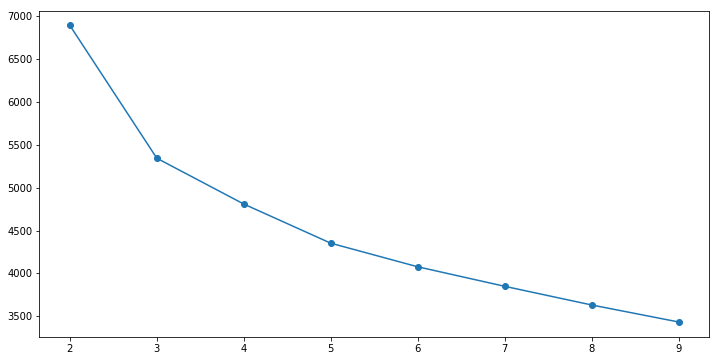

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
#from 5 onwards the change in slope is less hence choosing k=3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [19]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(vehicle_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [20]:
# Get the centroids.... using function cluster_centers_
centroids = cluster.cluster_centers_
centroids

array([[-0.23153062, -0.5739037 , -0.30977469, -0.04300694,  0.18122857,
        -0.18757768, -0.4584778 ,  0.32324786, -0.48783002, -0.53833276,
        -0.42373269, -0.4626712 , -0.60188377, -0.63786842, -0.07152328,
        -0.00564055,  0.81589069,  0.69512099],
       [ 1.12860661,  1.16764583,  1.20463404,  0.97709676,  0.11342825,
         0.23012719,  1.26861319, -1.20104443,  1.26802405,  1.08630615,
         1.17012971,  1.27318919,  1.06493596, -0.13897113,  0.14485738,
         0.25559661,  0.02364401,  0.21800355],
       [-0.9177389 , -0.51857633, -0.88657248, -1.08740815, -0.56181413,
        -0.29894021, -0.77701062,  0.86292098, -0.74325955, -0.48152087,
        -0.7981843 , -0.7817959 , -0.38672152,  0.78892409, -0.10398552,
        -0.30219051, -1.05284528, -1.10783453]])

In [21]:
prediction=cluster.predict(vehicle_df_z) # Count of values in each cluster
# Count the values in each cluster
np.bincount(prediction)

array([306, 249, 238], dtype=int32)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [22]:
#alternatively a new dataframe can be formed
colnames=vehicle_df_z.columns
X_df = pd.DataFrame(vehicle_df_z, columns= colnames)
X_df["group"] = prediction
X_df

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
6       0.406283    -0.293543             -0.573312      0.116137   
7      -0.444400    -0.293543             -1.017098     -0.360128   
8      -0.930504    -1.758654             -1.270690     -0.866160   
10     -0.930504    -1.433074             -0.763506     -0.776860   
11     -0.444400    -1.758654             -1.017098     -0.985226   
12     -0.687452     0.194828             -0.509914      0.056604   
13     -0.565926    -0.456333              0.187465     -0.747094   
14      0.041705     0.683198             -0.192923      1.009135   
15      0.284757     1.659939              1.328629      0.949602   
16     -0.565926    -1.433074             -1.968068     -1.788924   
17      0.649335    -0.619123             -0.319719      0.830535   
18      1.256966     1.497149              1.138435      0.503103   
20     -1.173556     0.357618             -0.446516     -0.479194   
21     -1.173556    -1.270284             -1.841272     -1.431725   
22      0.041705    -0.293543             -1.143894      0.116137   
23     -0.808978    -0.944703             -0.763506     -0.628027   
24      0.649335     1.334359              1.455425      1.485400   
25     -1.052030     0.032037             -0.129525     -0.449428   
26     -1.295083    -1.433074             -1.777874     -1.491258   
27      1.621544     1.497149              1.011639      1.009135   
28      1.013913     0.032037              0.187465      0.711469   
29     -1.659661    -1.107494             -1.207292     -1.193592   
30     -0.565926    -0.293543              0.187465     -0.270828   
31     -0.687452    -0.456333             -0.319719     -0.538728   
32     -0.079822    -1.595864             -1.017098     -0.449428   
33      0.892387     0.520408              1.582222      1.574700   
..           ...          ...                   ...           ...   
815    -1.538135     0.032037             -0.890302     -0.449428   
816    -0.444400     0.520408              0.187465     -0.360128   
817     1.256966     1.334359              1.645620      1.038901   
818     0.163231    -0.293543              0.884843      0.979368   
819    -0.079822    -0.456333              1.011639      0.681702   
820    -0.808978    -1.107494             -0.700108     -1.372192   
821     1.256966     1.822729              0.884843      1.842599   
822     0.163231    -0.619123             -0.002729      0.026838   
823     1.378492     1.497149              1.455425      1.306800   
824     1.500018     1.659939              0.884843      0.800769   
825    -0.930504    -0.944703              0.124067     -0.598261   
826     0.163231     0.683198              0.631251      0.711469   
827     0.649335     1.985519              1.138435      0.235204   
828    -0.565926    -0.456333             -1.017098     -1.312659   
829     0.163231     0.683198             -0.002729     -0.895926   
830     0.406283    -1.270284             -0.763506      0.116137   
831     0.770861     0.357618             -0.763506      0.473336   
832     1.743070     0.683198              1.709018      1.038901   
833    -0.201348     0.194828              0.060669     -0.449428   
834    -1.416609    -1.433074             -1.968068     -1.640091   
836    -0.808978     0.032037             -1.017098     -0.895926   
837     0.041705     0.194828             -0.319719     -0.002929   
838     0.163231    -0.293543             -0.383118     -0.806627   
839    -0.444400    -0.130753             -0.636710     -0.360128   
840    -0.079822    -1.758654             -1.017098     -0.866160   
841    -0.079822    -0.944703              0.314261      0.413803   
842

### Use kmeans.labels_ function to print out the labels of the classes

In [23]:
labels = cluster.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[306 249 238]


In [24]:
## creating a new dataframe only for labels and converting it into categorical variable
vehicle_labels = pd.DataFrame(cluster.labels_ , columns = list(['labels']))

vehicle_labels['labels'] = vehicle_labels['labels'].astype('category')

In [27]:
# Joining the label dataframe with the vehicle data frame to create vehicle_df_labeled.
vehicle_df_labeled = vehicle_df_z.join(vehicle_labels)

In [29]:
vehicle_analysis = (vehicle_df_labeled.groupby(['labels'] , axis=0)).head(300)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
vehicle_analysis

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
6       0.406283    -0.293543             -0.573312      0.116137   
7      -0.444400    -0.293543             -1.017098     -0.360128   
8      -0.930504    -1.758654             -1.270690     -0.866160   
10     -0.930504    -1.433074             -0.763506     -0.776860   
11     -0.444400    -1.758654             -1.017098     -0.985226   
12     -0.687452     0.194828             -0.509914      0.056604   
13     -0.565926    -0.456333              0.187465     -0.747094   
14      0.041705     0.683198             -0.192923      1.009135   
15      0.284757     1.659939              1.328629      0.949602   
16     -0.565926    -1.433074             -1.968068     -1.788924   
17      0.649335    -0.619123             -0.319719      0.830535   
18      1.256966     1.497149              1.138435      0.503103   
20     -1.173556     0.357618             -0.446516     -0.479194   
21     -1.173556    -1.270284             -1.841272     -1.431725   
22      0.041705    -0.293543             -1.143894      0.116137   
23     -0.808978    -0.944703             -0.763506     -0.628027   
24      0.649335     1.334359              1.455425      1.485400   
25     -1.052030     0.032037             -0.129525     -0.449428   
26     -1.295083    -1.433074             -1.777874     -1.491258   
27      1.621544     1.497149              1.011639      1.009135   
28      1.013913     0.032037              0.187465      0.711469   
29     -1.659661    -1.107494             -1.207292     -1.193592   
30     -0.565926    -0.293543              0.187465     -0.270828   
31     -0.687452    -0.456333             -0.319719     -0.538728   
32     -0.079822    -1.595864             -1.017098     -0.449428   
33      0.892387     0.520408              1.582222      1.574700   
..           ...          ...                   ...           ...   
815    -1.538135     0.032037             -0.890302     -0.449428   
816    -0.444400     0.520408              0.187465     -0.360128   
817     1.256966     1.334359              1.645620      1.038901   
818     0.163231    -0.293543              0.884843      0.979368   
819    -0.079822    -0.456333              1.011639      0.681702   
820    -0.808978    -1.107494             -0.700108     -1.372192   
821     1.256966     1.822729              0.884843      1.842599   
822     0.163231    -0.619123             -0.002729      0.026838   
823     1.378492     1.497149              1.455425      1.306800   
824     1.500018     1.659939              0.884843      0.800769   
825    -0.930504    -0.944703              0.124067     -0.598261   
826     0.163231     0.683198              0.631251      0.711469   
827     0.649335     1.985519              1.138435      0.235204   
828    -0.565926    -0.456333             -1.017098     -1.312659   
829     0.163231     0.683198             -0.002729     -0.895926   
830     0.406283    -1.270284             -0.763506      0.116137   
831     0.770861     0.357618             -0.763506      0.473336   
832     1.743070     0.683198              1.709018      1.038901   
833    -0.201348     0.194828              0.060669     -0.449428   
834    -1.416609    -1.433074             -1.968068     -1.640091   
836    -0.808978     0.032037             -1.017098     -0.895926   
837     0.041705     0.194828             -0.319719     -0.002929   
838     0.163231    -0.293543             -0.383118     -0.806627   
839    -0.444400    -0.130753             -0.636710     -0.360128   
840    -0.079822    -1.758654             -1.017098     -0.866160   
841    -0.079822    -0.944703              0.314261      0.413803   
842